In [6]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [7]:
df_ratings = pd.read_csv('MFdata/ratings.csv')
df_movies = pd.read_csv('MFdata/movies.csv')

In [8]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [9]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
print(df_ratings.shape) , print(df_movies.shape)

(100004, 4)
(9125, 3)


(None, None)

# Preprocessing

In [12]:
df_ratings.drop('timestamp', axis=1, inplace =True)
df_ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [13]:
df_movies.drop('genres', axis=1, inplace = True)
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [16]:
user_movie = pd.merge(df_ratings, df_movies, on = 'movieId')
print(user_movie.shape)
user_movie.head()

(100004, 4)


,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


In [17]:
## Making Pivot Table
user_movie_matrix = user_movie.pivot_table('rating', index = 'userId', columns = 'title').fillna(0)
print(user_movie_matrix.shape)
user_movie_matrix.head()

(671, 9064)


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
movie_user_matrix = user_movie_matrix.values.T
print(movie_user_matrix.shape)
type(movie_user_matrix)

(9064, 671)


numpy.ndarray

# Making SVD

In [21]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_user_matrix)
print(matrix.shape)
matrix

(9064, 12)


array([[ 1.22749131e-02,  2.50804375e-03,  1.55531313e-02, ...,
        -1.96004317e-02,  1.27233948e-02, -1.28100211e-02],
       [ 4.23038305e-01, -6.93401280e-03, -4.06854213e-01, ...,
         3.13926941e-02, -5.06590570e-01, -1.92800734e-01],
       [ 1.66327789e-01,  1.08321976e-01,  6.02794844e-02, ...,
         2.12324996e-01,  5.93951087e-02,  1.61373994e-02],
       ...,
       [ 8.51772030e+00, -3.31481888e+00,  9.03537585e-01, ...,
        -2.18872722e-01,  8.39961186e-01,  2.58880910e+00],
       [ 3.19207073e-01,  3.05413614e-01, -5.41717037e-01, ...,
        -4.48365411e-02, -6.31497110e-01, -1.15020870e-02],
       [ 1.04837792e-01,  2.96777354e-01, -2.18216045e-01, ...,
        -1.93946657e-01,  9.52298932e-02,  1.25483030e-01]])

In [22]:
corr = np.corrcoef(matrix)
print(corr.shape)

(9064, 9064)


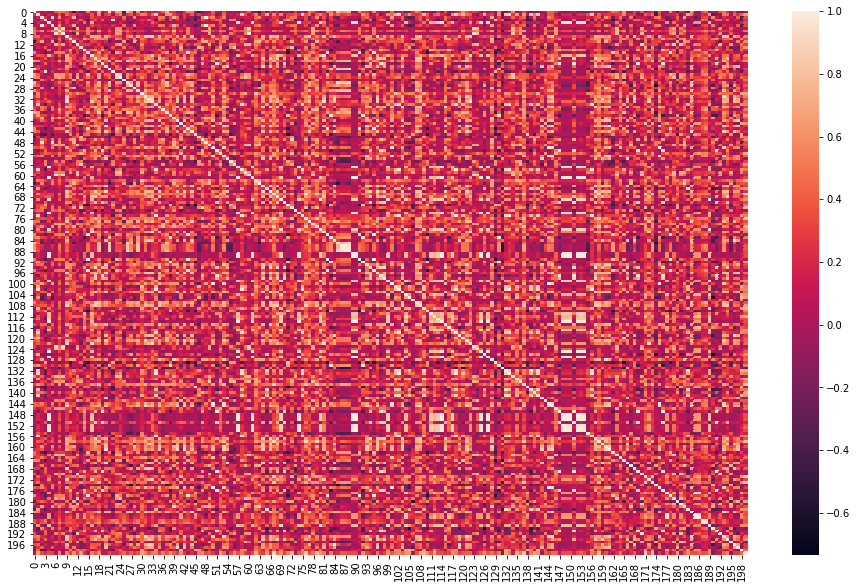

In [23]:
corr2 = corr[:200, :200]
plt.figure(figsize=(16,10))
sns.heatmap(corr2)

In [25]:
title = user_movie_matrix.columns
title_list = list(title)
coffey_hands = title_list.index('Toy Story (1995)')

In [28]:
corr[coffey_hands]

array([0.3241072 , 0.476284  , 0.29202741, ..., 0.72193171, 0.27571589,
       0.27818823])

In [26]:
corr_coffey_hands = corr[coffey_hands]
list(title[(corr_coffey_hands >= 0.9)])

['Before Sunrise (1995)',
 'Last of the Mohicans, The (1992)',
 'Sleepers (1996)',
 'Toy Story (1995)']

# Recommendation to User

In [52]:
user_movie_rating = df_ratings.pivot(values = 'rating', index ='userId', columns ='movieId').fillna(0)
user_movie_rating

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# transfer user_movie_rating to matrix
user_movie_matrix = user_movie_rating.values
print(user_movie_matrix.shape)
user_movie_matrix


(671, 9066)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [68]:
user_ratings_mean = np.mean(user_movie_matrix, axis = 1)
print(user_ratings_mean.shape)

#user_movie_matirx - mean
# to make NaN to some value to use SVD
matrix_user_rating_reg = user_movie_matrix - user_ratings_mean.reshape(-1,1)
matrix_user_rating_reg

(671,)


array([[-0.00562541, -0.00562541, -0.00562541, ..., -0.00562541,
        -0.00562541, -0.00562541],
       [-0.02923009, -0.02923009, -0.02923009, ..., -0.02923009,
        -0.02923009, -0.02923009],
       [-0.02007501, -0.02007501, -0.02007501, ..., -0.02007501,
        -0.02007501, -0.02007501],
       ...,
       [-0.01367748, -0.01367748, -0.01367748, ..., -0.01367748,
        -0.01367748, -0.01367748],
       [ 3.98698434, -0.01301566, -0.01301566, ..., -0.01301566,
        -0.01301566, -0.01301566],
       [ 4.95030885, -0.04969115, -0.04969115, ..., -0.04969115,
        -0.04969115, -0.04969115]])

In [69]:
pd.DataFrame(matrix_user_rating_reg, columns = user_movie_rating.columns).head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,...,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625
1,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,3.970770,...,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230
2,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,...,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075
3,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,3.902162,...,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838
4,-0.043128,-0.043128,3.956872,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,...,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128


In [72]:
# SVD

U, sigma, Vt = svds(matrix_user_rating_reg, k = 12)
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(671, 12)
(12,)
(12, 9066)


In [75]:
# 1d siga to 2d
sigma = np.diag(sigma)
print(sigma.shape)

(12, 12)


In [76]:
svd_predicted_rating = np.dot(np.dot(U,sigma), Vt) + user_ratings_mean.reshape(-1,1)
svd_pred =  pd.DataFrame(svd_predicted_rating, columns = user_movie_rating.columns)
svd_pred

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.079686,0.021779,-0.013837,-0.005870,-0.028877,0.032371,0.000715,-0.004428,-0.005219,0.038195,...,-0.004324,-0.004352,0.010478,-0.004256,-0.003944,-0.005674,0.018157,-0.005575,-0.005297,-0.003766
1,1.428452,1.608841,0.529476,0.168278,0.520809,1.107473,0.529719,0.089376,0.296270,1.970031,...,0.013227,-0.002275,0.020680,-0.005245,-0.007644,-0.021019,0.031243,-0.000957,-0.000753,0.026901
2,0.977246,0.396971,0.000299,0.027444,0.021287,0.141458,-0.057134,0.031633,-0.012538,0.383576,...,0.002761,0.004907,-0.014190,-0.000251,-0.006007,-0.003189,-0.026916,0.014637,0.013287,-0.005741
3,1.870844,1.169993,0.252202,0.094831,-0.181713,-0.511953,-0.027820,-0.143080,0.013247,1.461694,...,0.026412,-0.027245,0.054681,0.018450,0.034544,-0.035740,0.088889,-0.019365,-0.017113,0.066559
4,1.182777,0.924903,0.075998,0.061505,0.602680,-0.159825,0.339925,0.081534,-0.079666,0.535018,...,-0.029124,-0.029357,0.009064,-0.029092,-0.030890,-0.057453,0.026344,-0.024027,-0.024614,-0.032752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,1.577140,1.002294,0.699893,0.157323,0.631404,1.447100,0.658630,0.027763,0.347034,1.393400,...,-0.000740,0.005554,-0.022873,0.002715,0.005142,0.009042,-0.033241,-0.003929,-0.003212,0.000658
667,0.405596,0.011198,0.022474,0.025968,-0.015645,0.222755,-0.074666,0.000733,0.001368,0.074340,...,-0.004024,0.005189,-0.008046,0.005195,0.004814,-0.007049,-0.015048,0.005298,0.005562,-0.014007
668,0.360704,-0.000016,0.086261,0.012227,0.090441,0.053472,0.028401,-0.010500,0.008004,-0.021811,...,-0.002954,-0.000573,-0.012094,0.003460,0.005672,-0.002675,-0.017659,-0.001340,-0.001189,-0.004946
669,1.054516,0.265079,0.223782,0.054706,0.189281,0.584825,0.129335,0.017404,0.088330,0.435521,...,-0.002090,0.004452,-0.039603,0.003322,0.002830,0.001331,-0.061556,0.005344,0.004928,-0.008484


In [79]:
"""
svd_pred : DataFrame of svd_prediction
user_id : user_id
movie_df : movie's DataFrame
rating_df: rating DataFrame
num_recommendation : number of  maximum recommendation
"""

def recommend_movies(svd_pred, user_id, movie_df, rating_df, num_recommendation =5):
    user_index = user_id -1
    
    # sort the predicted rating by user id
    user_pred = svd_pred.iloc[user_index].sort_values(ascending = False)
    
    # extract user data from original rating data
    user_data = rating_df[rating_df.userId == user_id]
    # merge user_data and movie_df
    user_record = user_data.merge(movie_df,on='movieId').sort_values(['rating'], ascending = False)
    
    # data except user already seen
    recommendation = movie_df[~movie_df['movieId'].isin(user_record['movieId'])]
    
    # merge recommendation and user_prediction
    recommendation = recommendation.merge(pd.DataFrame(user_pred).reset_index(), on = 'movieId')
    
    recommendation = recommendation.rename(columns = {user_index : 'Predictions'}).sort_values('Predictions',ascending = False).iloc[:num_recommendation, :]
    
    return user_record, recommendation
    

In [81]:
record, pred = recommend_movies(svd_pred, 100, df_movies, df_ratings, 20)
record

,userId,movieId,rating,title
23,100,1073,5.0,Willy Wonka & the Chocolate Factory (1971)
5,100,32,5.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
0,100,1,4.0,Toy Story (1995)
1,100,3,4.0,Grumpier Old Men (1995)
22,100,802,4.0,Phenomenon (1996)
19,100,745,4.0,Wallace & Gromit: A Close Shave (1995)
13,100,608,4.0,Fargo (1996)
24,100,1356,4.0,Star Trek: First Contact (1996)
4,100,25,4.0,Leaving Las Vegas (1995)
8,100,86,3.0,White Squall (1996)


In [82]:
pred

,movieId,title,Predictions
219,260,Star Wars: Episode IV - A New Hope (1977),1.189354
428,494,Executive Decision (1996),0.820951
28,36,Dead Man Walking (1995),0.813329
942,1210,Star Wars: Episode VI - Return of the Jedi (1983),0.747737
12,17,Sense and Sensibility (1995),0.718798
929,1196,Star Wars: Episode V - The Empire Strikes Back...,0.627468
393,457,"Fugitive, The (1993)",0.620913
509,589,Terminator 2: Judgment Day (1991),0.605944
116,150,Apollo 13 (1995),0.599693
414,480,Jurassic Park (1993),0.536123
